In [1]:
import keras 
import tensorflow as tf
import cv2
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

In [3]:
training_set = train_datagen.flow_from_directory('Train',
                                                 target_size = (128, 128),
                                                 batch_size = 1,
                                                 class_mode = 'categorical')

#import for validation dataset
validation_set = validation_datagen.flow_from_directory('Validation',
                                                 target_size = (128, 128),
                                                 batch_size = 1,
                                                 class_mode = 'categorical')


STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=validation_set.n//validation_set.batch_size

Found 300 images belonging to 7 classes.
Found 72 images belonging to 7 classes.


In [5]:
training_set.class_indices


{'.ipynb_checkpoints': 0,
 'Carva': 1,
 'Casemero': 2,
 'Eka': 3,
 'Messi': 4,
 'Ramos': 5,
 'Ronaldho': 6}

In [6]:
IMAGE_SIZE = [128, 128] #size of images
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) #initiation of import VGG16

for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

prediction = Dense(7, activation='softmax')(x) #initiation for number of maximal output dense
model = Model(inputs=vgg.input, outputs=prediction)
model.compile(loss='categorical_crossentropy', #categorical_crosentropy is for multilabel (over than 2 classes)
                    optimizer=tf.optimizers.Adam(0.001), #learning rate (estimation/itterate)
                    metrics=['accuracy'])

58900480/58889256 [==============================] - 0s 0us/step


In [7]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from google.colab.patches import cv2_imshow

In [9]:
import IPython

SVG(model_to_dot(model).create(prog='dot', format='svg'))

keras.utils.plot_model(model, to_file='test_CNN_Keras.png', show_shapes=True)
IPython.display.Image('test_keras_plot_model.png')

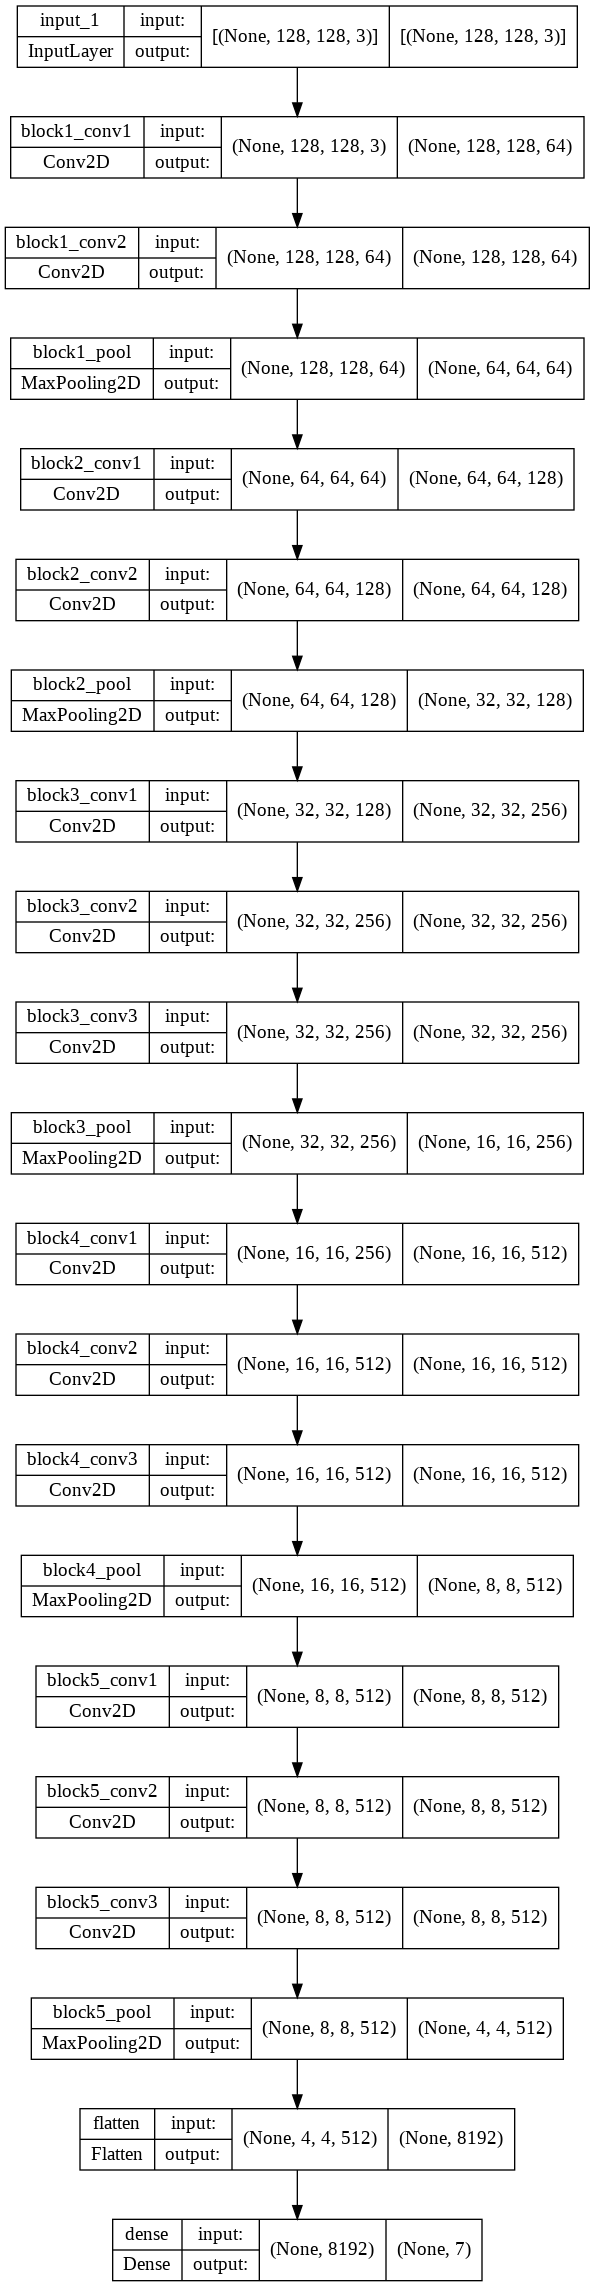

In [10]:
img = cv2.imread('test_CNN_Keras.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [12]:
model_fit = model.fit(training_set,
                   
                     epochs = 5, #itteration for training
                     validation_data = validation_set)

Epoch 1/5
300/300 [==============================] - 71s 236ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 2.6573 - val_accuracy: 0.7639
Epoch 2/5
300/300 [==============================] - 70s 235ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 2.9294 - val_accuracy: 0.6944
Epoch 3/5
300/300 [==============================] - 71s 236ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 2.7966 - val_accuracy: 0.7222
Epoch 4/5
300/300 [==============================] - 72s 239ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 2.7984 - val_accuracy: 0.7500
Epoch 5/5
300/300 [==============================] - 70s 234ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 2.7808 - val_accuracy: 0.7222


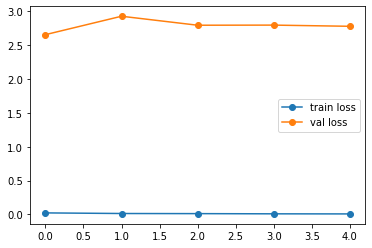

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(model_fit.history['loss'], '-o',label='train loss')
plt.plot(model_fit.history['val_loss'], '-o' ,label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

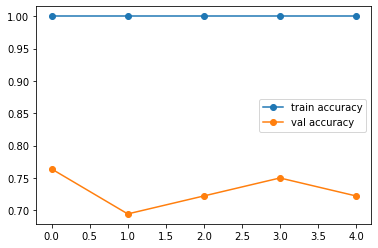

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(model_fit.history['accuracy'], '-o',label='train accuracy')
plt.plot(model_fit.history['val_accuracy'], '-o',label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

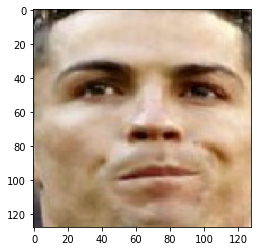

Messi


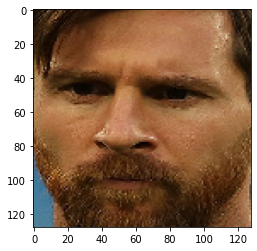

Messi


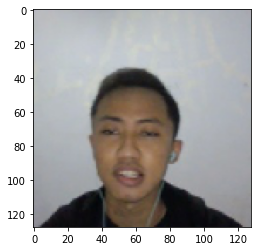

Eka


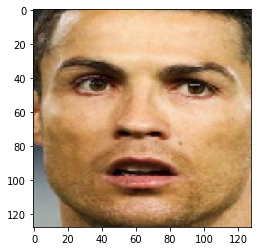

Ramos


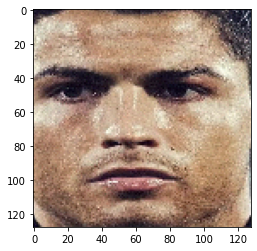

Messi


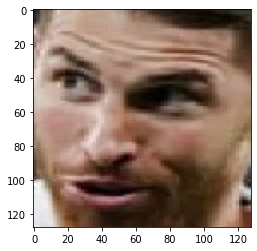

Eka


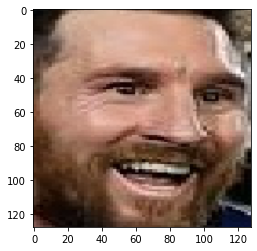

Messi


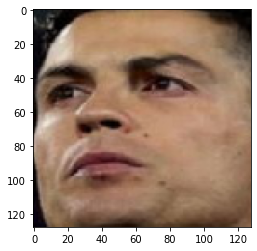

Ramos


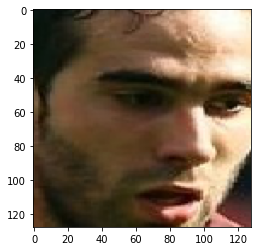

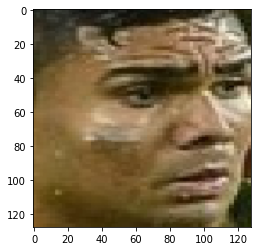

Ronaldho


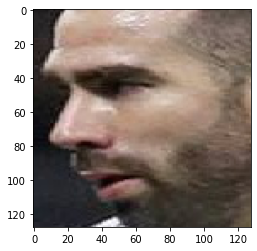

Messi


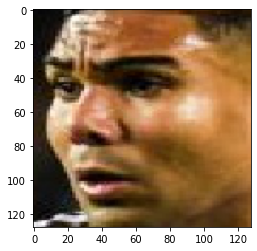

Ramos


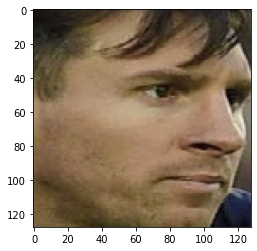

Messi


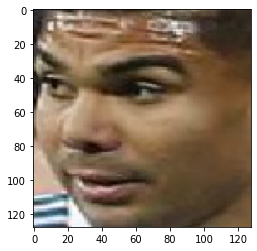

Ramos


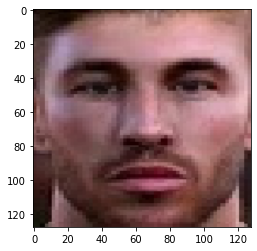

Ramos


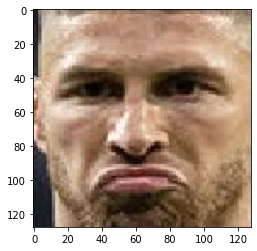

Ramos


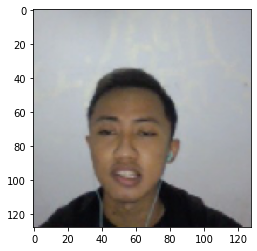

Eka


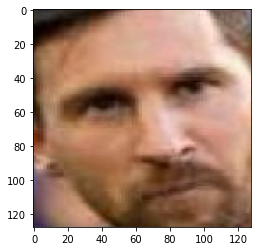

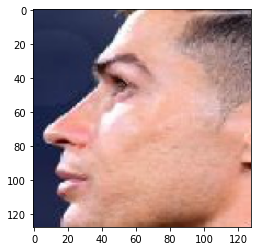

Messi


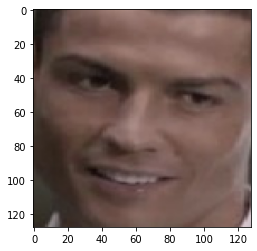

Eka


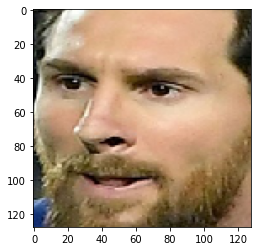

Messi


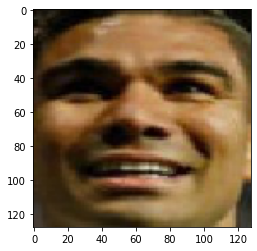

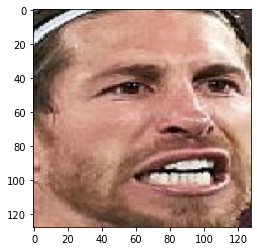

Ramos


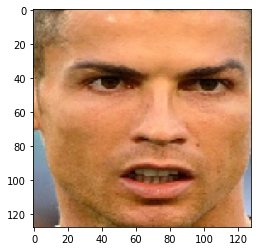

Ramos


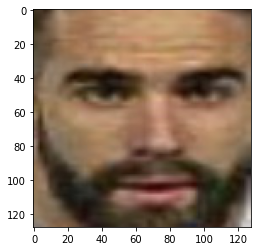

Ramos


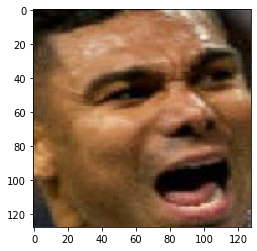

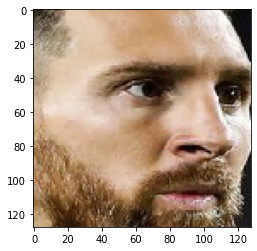

Messi


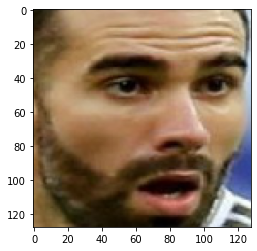

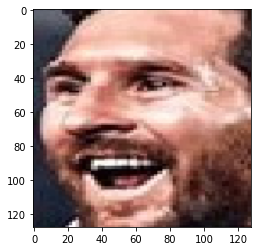

Messi


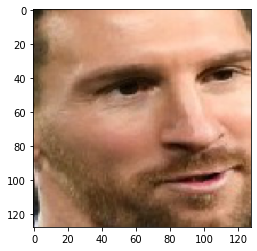

Messi


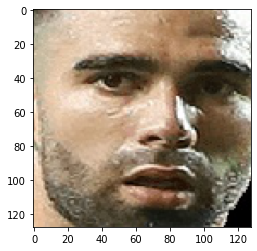

Ramos


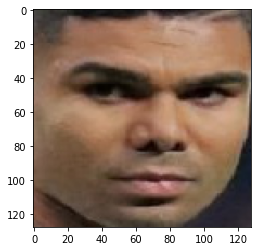

Messi


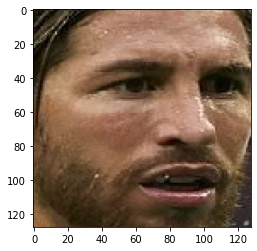

Ramos


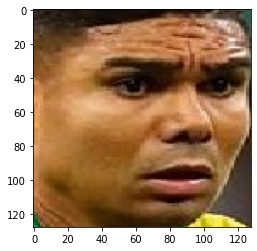

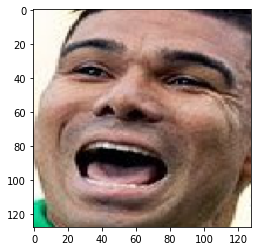

Ramos


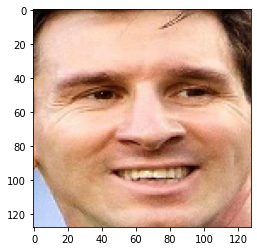

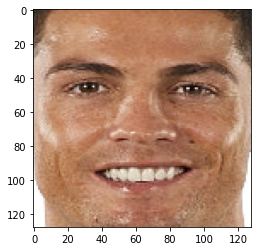

Ramos


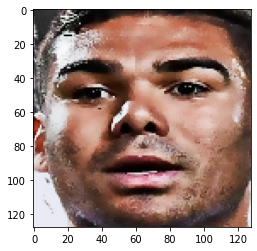

Ramos


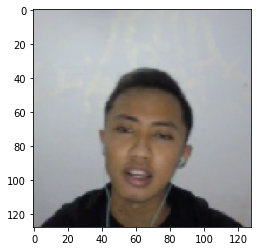

Eka


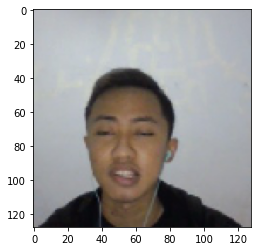

Eka


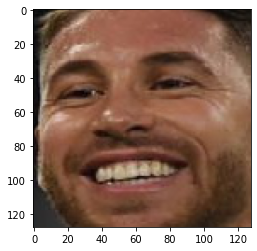

Ramos


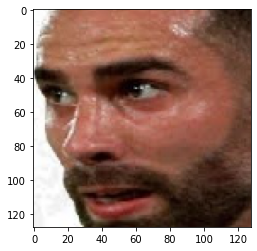

Ramos


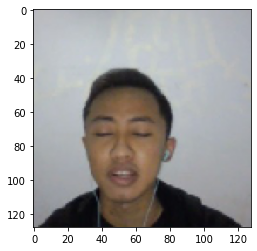

Eka


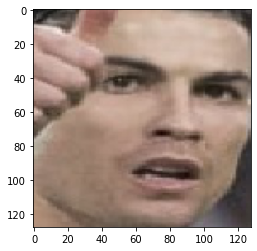

Ronaldho


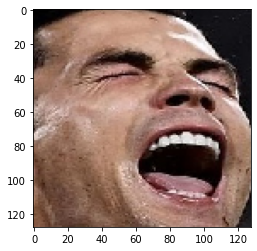

Ramos


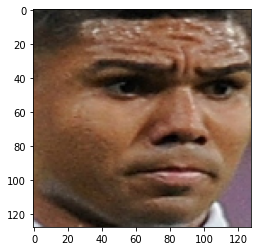

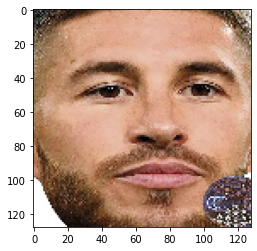

Ramos


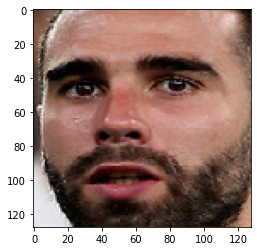

Eka


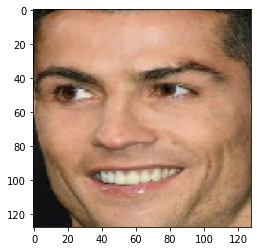

Ramos


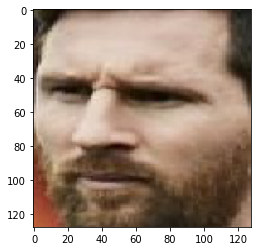

Messi


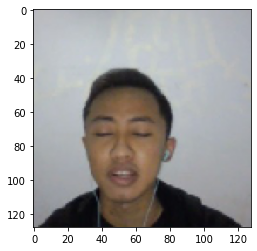

Eka


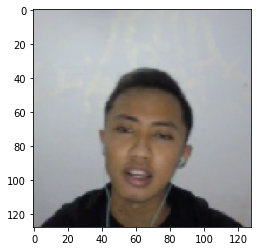

Eka


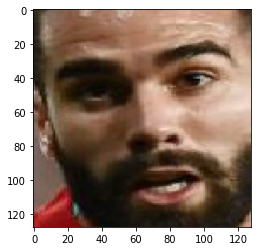

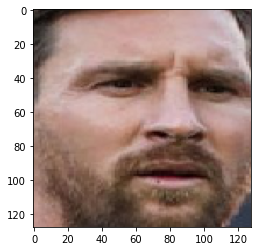

Messi


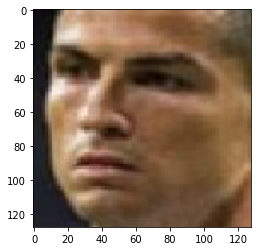

Ramos


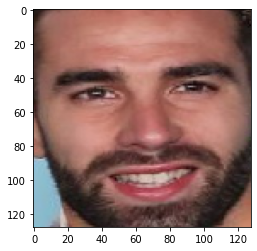

Eka


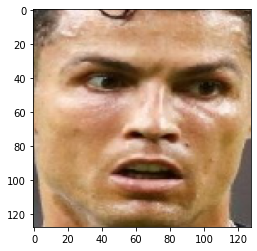

Ramos


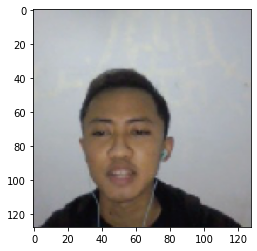

Eka


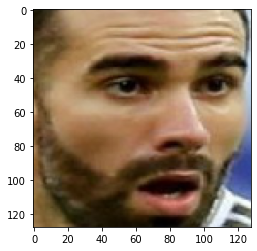

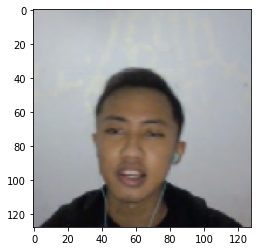

Eka


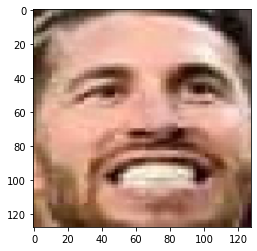

Ramos


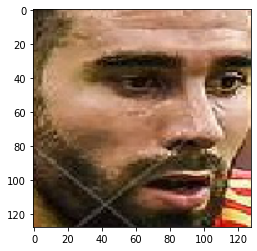

Eka


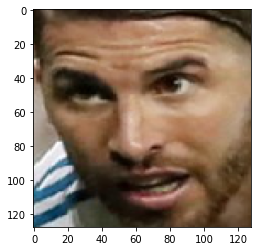

Ramos


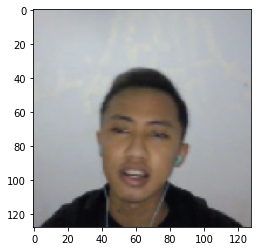

Eka


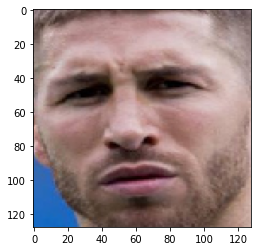

Ramos


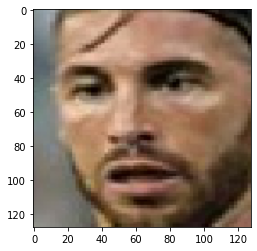

Ramos


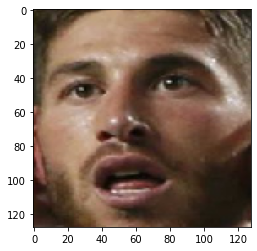

Ramos


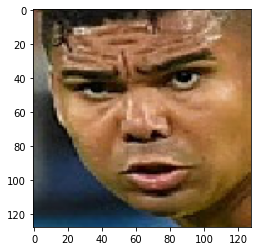

Ramos


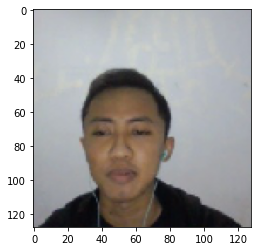

Eka


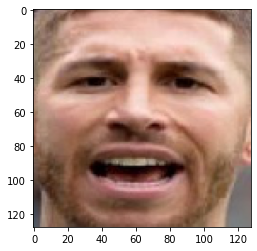

Ramos


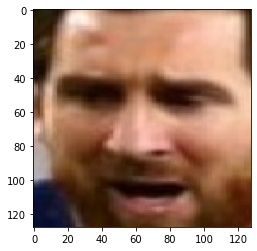

Messi


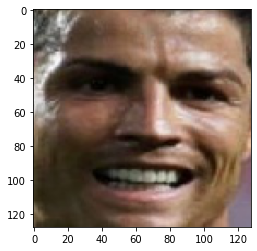

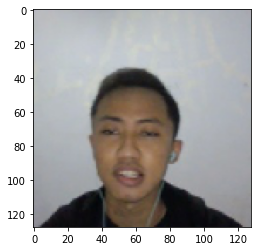

Eka


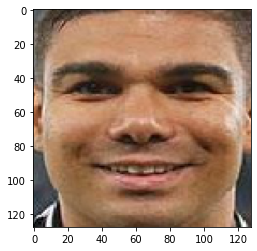

Messi


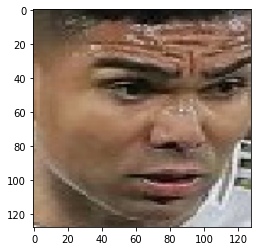

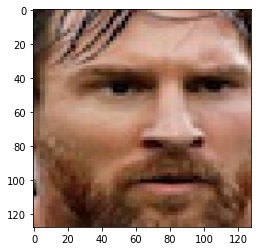

Messi


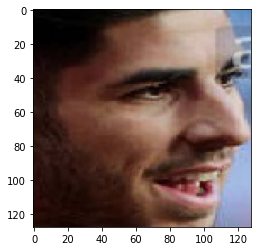

Messi


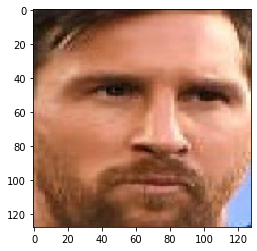

Messi


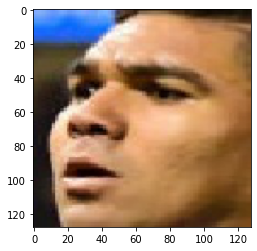

Ramos


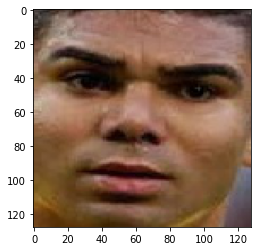

Ramos


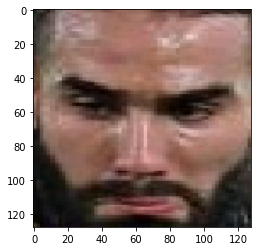

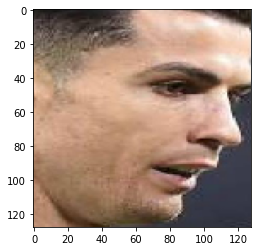

Messi


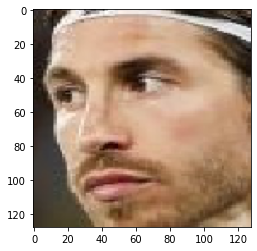

Ramos


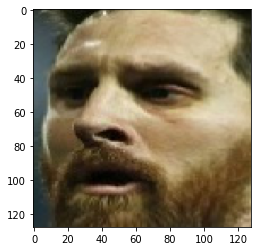

Messi


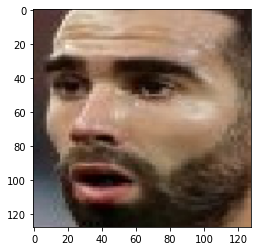

Eka


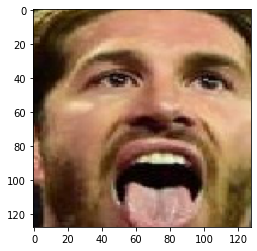

Ramos


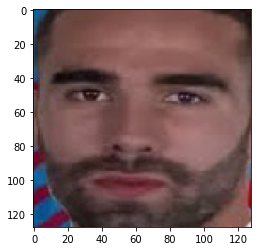

Eka


In [15]:
import os
dir_path = 'Prediction/'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size=(128,128))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val[0][0]==1:
        print('none')
    elif val[0][1]==1:
        print('Carva')
    elif val[0][2]==1:
        print('Casemero')
    elif val[0][3]==1:
        print('Eka')
    elif val[0][4]==1:
        print('Messi')
    elif val[0][5]==1:
        print('Ramos')
    elif val[0][6]==1:
        print('Ronaldho')
    